# Introduction

In this analysis, we delve into an exploration of employee demographics, salaries, tenures, and more within our organization. The dataset provides a rich source of information, allowing us to uncover valuable insights and trends that can inform strategic decision-making and improve organizational effectiveness.

Throughout this analysis, I address key questions related to the distribution of employees by race/ethnicity, gender, and employment type. I also examine age distribution, tenure analysis, salary distribution, and disparities, as well as average salaries within departments or positions.

By leveraging the power of Python and its data manipulation and visualization libraries, I navigate through the dataset to discover hidden patterns and gain a deeper understanding of the workforce. This analysis aims to provide actionable insights that can drive positive change and enhance the organization's performance.

**Note:** In the dataset, the difference between Hire Date and Job Date are;

1. Hire Date refers to the date when the employee was initially hired by the company.
2. Job Date refers to the date when the employee started their current or most recent position within the company.


In [3]:
# Here I load the the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# Here I load the data
df = pd.read_csv("employee.csv")
df

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE
0,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,2006-06-12,2012-10-13
1,1,LIBRARY ASSISTANT,Library,26125.0,Hispanic/Latino,Full Time,Female,Active,2000-07-19,2010-09-18
2,2,POLICE OFFICER,Houston Police Department-HPD,45279.0,White,Full Time,Male,Active,2015-02-03,2015-02-03
3,3,ENGINEER/OPERATOR,Houston Fire Department (HFD),63166.0,White,Full Time,Male,Active,1982-02-08,1991-05-25
4,4,ELECTRICIAN,General Services Department,56347.0,White,Full Time,Male,Active,1989-06-19,1994-10-22
...,...,...,...,...,...,...,...,...,...,...
1995,1995,POLICE OFFICER,Houston Police Department-HPD,43443.0,White,Full Time,Male,Active,2014-06-09,2015-06-09
1996,1996,COMMUNICATIONS CAPTAIN,Houston Fire Department (HFD),66523.0,Black or African American,Full Time,Male,Active,2003-09-02,2013-10-06
1997,1997,POLICE OFFICER,Houston Police Department-HPD,43443.0,White,Full Time,Male,Active,2014-10-13,2015-10-13
1998,1998,POLICE OFFICER,Houston Police Department-HPD,55461.0,Asian/Pacific Islander,Full Time,Male,Active,2009-01-20,2011-07-02


In [4]:
# Check for null values across the columns
# BASE_SALARY, RACE, JOB_DATE have null values (entries less than 2000)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   UNIQUE_ID          2000 non-null   int64  
 1   POSITION_TITLE     2000 non-null   object 
 2   DEPARTMENT         2000 non-null   object 
 3   BASE_SALARY        1886 non-null   float64
 4   RACE               1965 non-null   object 
 5   EMPLOYMENT_TYPE    2000 non-null   object 
 6   GENDER             2000 non-null   object 
 7   EMPLOYMENT_STATUS  2000 non-null   object 
 8   HIRE_DATE          2000 non-null   object 
 9   JOB_DATE           1997 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 156.4+ KB


In [5]:
# Check the rows and columns available
df.shape

(2000, 10)

In [6]:
# Compute summary statistics
df.describe()

,UNIQUE_ID,BASE_SALARY
count,2000.000000,1886.000000
mean,999.500000,55767.931601
std,577.494589,21693.706679
min,0.000000,24960.000000
25%,499.750000,40170.000000
50%,999.500000,54461.000000
75%,1499.250000,66614.000000
max,1999.000000,275000.000000


In [7]:
# Convert header columns into lower case
df.columns = [x.lower() for x in df.columns]
df

,unique_id,position_title,department,base_salary,race,employment_type,gender,employment_status,hire_date,job_date
0,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,2006-06-12,2012-10-13
1,1,LIBRARY ASSISTANT,Library,26125.0,Hispanic/Latino,Full Time,Female,Active,2000-07-19,2010-09-18
2,2,POLICE OFFICER,Houston Police Department-HPD,45279.0,White,Full Time,Male,Active,2015-02-03,2015-02-03
3,3,ENGINEER/OPERATOR,Houston Fire Department (HFD),63166.0,White,Full Time,Male,Active,1982-02-08,1991-05-25
4,4,ELECTRICIAN,General Services Department,56347.0,White,Full Time,Male,Active,1989-06-19,1994-10-22
...,...,...,...,...,...,...,...,...,...,...
1995,1995,POLICE OFFICER,Houston Police Department-HPD,43443.0,White,Full Time,Male,Active,2014-06-09,2015-06-09
1996,1996,COMMUNICATIONS CAPTAIN,Houston Fire Department (HFD),66523.0,Black or African American,Full Time,Male,Active,2003-09-02,2013-10-06
1997,1997,POLICE OFFICER,Houston Police Department-HPD,43443.0,White,Full Time,Male,Active,2014-10-13,2015-10-13
1998,1998,POLICE OFFICER,Houston Police Department-HPD,55461.0,Asian/Pacific Islander,Full Time,Male,Active,2009-01-20,2011-07-02


In [8]:
# Check for missing data
df.isna().sum()

unique_id              0
position_title         0
department             0
base_salary          114
race                  35
employment_type        0
gender                 0
employment_status      0
hire_date              0
job_date               3
dtype: int64

In [9]:
# Compute mean of base_salary column
mean_base_salary = df['base_salary'].mean()
mean_base_salary

55767.93160127253

In [10]:
# Fill null values in base_salary column with mean of base_salary
df['base_salary'].fillna(mean_base_salary, inplace=True)

# Check that changes were effected
df.isna().sum()

unique_id             0
position_title        0
department            0
base_salary           0
race                 35
employment_type       0
gender                0
employment_status     0
hire_date             0
job_date              3
dtype: int64

In [11]:
# Drop missing data for race column
df.dropna(subset=['race'], inplace=True)

# Check that changes were effected
df.isna().sum()

unique_id            0
position_title       0
department           0
base_salary          0
race                 0
employment_type      0
gender               0
employment_status    0
hire_date            0
job_date             3
dtype: int64

In [12]:
# Fill missing job_date using forward fill approach
df['job_date'] = df['job_date'].fillna(method='ffill')
df.isna().sum()

unique_id            0
position_title       0
department           0
base_salary          0
race                 0
employment_type      0
gender               0
employment_status    0
hire_date            0
job_date             0
dtype: int64

In [13]:
# Change the data type of the date columns to datetime as opposed to the current a string/object data type
df[['hire_date', 'job_date']] = df[[
    'hire_date', 'job_date']].apply(pd.to_datetime)

In [14]:
# Confirm that the data is clean
# Entries: 1965
# Non-Null count: 1965
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1965 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   unique_id          1965 non-null   int64         
 1   position_title     1965 non-null   object        
 2   department         1965 non-null   object        
 3   base_salary        1965 non-null   float64       
 4   race               1965 non-null   object        
 5   employment_type    1965 non-null   object        
 6   gender             1965 non-null   object        
 7   employment_status  1965 non-null   object        
 8   hire_date          1965 non-null   datetime64[ns]
 9   job_date           1965 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(6)
memory usage: 168.9+ KB


With the data now cleaned, I begin the analysis.


### Question 1: Distribution by Race/Ethnicity:

1. What is the racial/ethnic composition of the workforce?
2. Are there any significant disparities in the representation of different racial/ethnic groups across departments or positions?


In [16]:
# Determine the racial/ethnic composition of the workforc
race_ethnicity_count = df.race.value_counts()
race_ethnicity_count

race
Black or African American            700
White                                665
Hispanic/Latino                      480
Asian/Pacific Islander               107
American Indian or Alaskan Native     11
Others                                 2
Name: count, dtype: int64

In [17]:
# Calculate the percentage representation of each racial/ethnic group
race_ethnicity_representation = df.race.value_counts(normalize=True) * 100
race_ethnicity_representation

race
Black or African American            35.623410
White                                33.842239
Hispanic/Latino                      24.427481
Asian/Pacific Islander                5.445293
American Indian or Alaskan Native     0.559796
Others                                0.101781
Name: proportion, dtype: float64

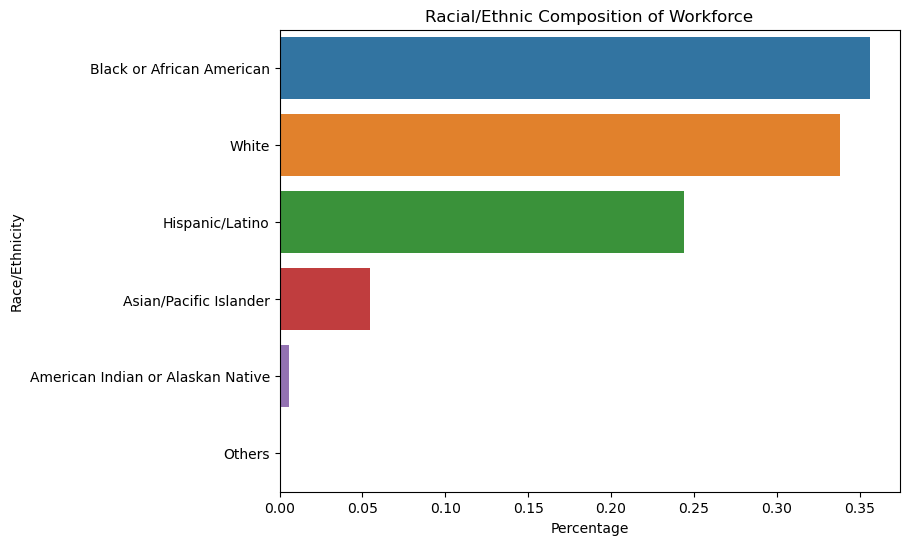

In [18]:
# Calculate the racial/ethnic composition of the workforce
race_ethnicity_distribution = df.race.value_counts(normalize=True)
plt.figure(figsize=(8, 6))
sns.barplot(x=race_ethnicity_distribution.values,
            y=race_ethnicity_distribution.index)
plt.title('Racial/Ethnic Composition of Workforce')
plt.xlabel('Percentage')
plt.ylabel('Race/Ethnicity')
plt.show()

In [28]:
# Calculate representation by department
department_representation = df.groupby(
    'department')['race'].value_counts(normalize=True) * 100

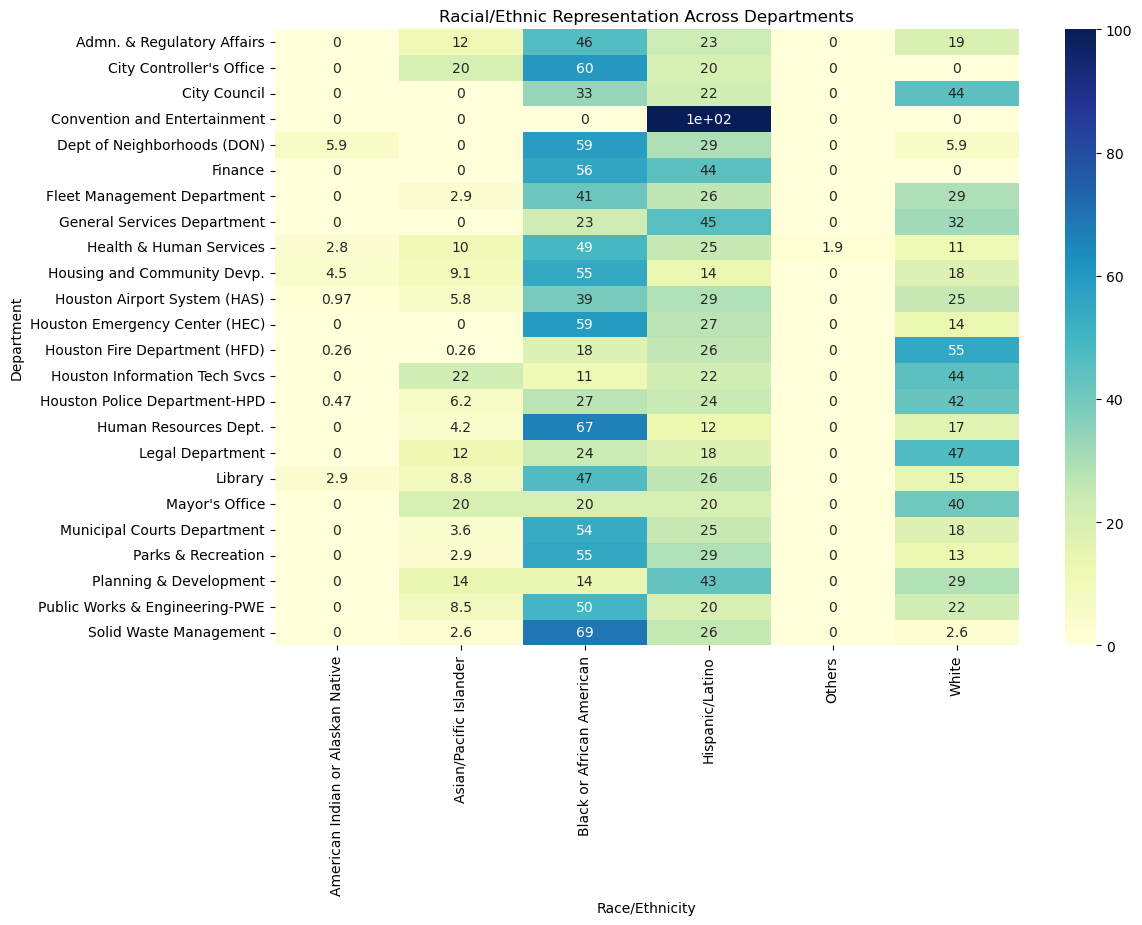

In [20]:
# Visualize race/ethnic representation across departments
department_representation = department_representation.unstack().fillna(0)
plt.figure(figsize=(12, 8))
sns.heatmap(department_representation, annot=True, cmap='YlGnBu')
plt.title('Racial/Ethnic Representation Across Departments')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Department')
plt.show()

In [21]:
# Perform chi-square test for department representation
chi2, p, _, _ = chi2_contingency(department_representation)
if p < 0.05:
    print("There is a significant difference in racial/ethnic representation across departments (p < 0.05)")
else:
    print("There is no significant difference in racial/ethnic representation across departments (p >= 0.05)")

There is a significant difference in racial/ethnic representation across departments (p < 0.05)


### Question 2: Gender Representation

1. What is the gender distribution within the organization?
2. Are there any gender imbalances in certain departments or roles?


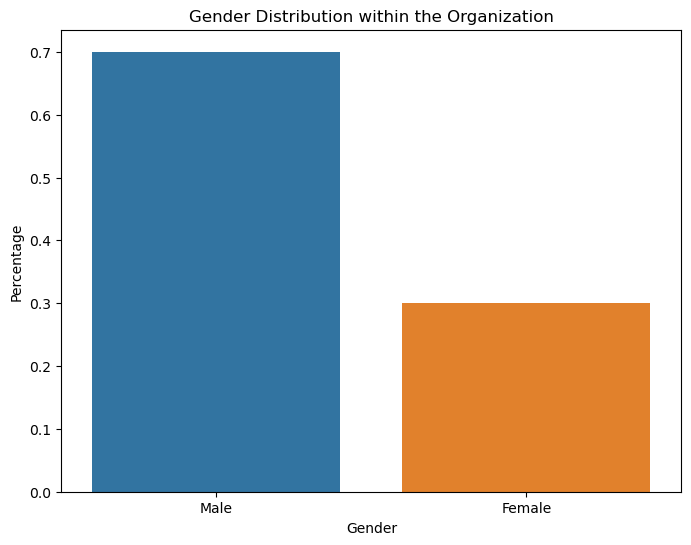

In [22]:
# Calculate the gender distribution within the organization
gender_distribution = df['gender'].value_counts(normalize=True)
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_distribution.index, y=gender_distribution.values)
plt.title('Gender Distribution within the Organization')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.show()

In [24]:
# Calculate the percentage representation of each gender
gender_representation = df['gender'].value_counts(normalize=True) * 100
gender_representation

gender
Male      70.025445
Female    29.974555
Name: proportion, dtype: float64

In [27]:
# Calculate representation by department or role
department_gender_representation = df.groupby(
    'department')['gender'].value_counts(normalize=True) * 100

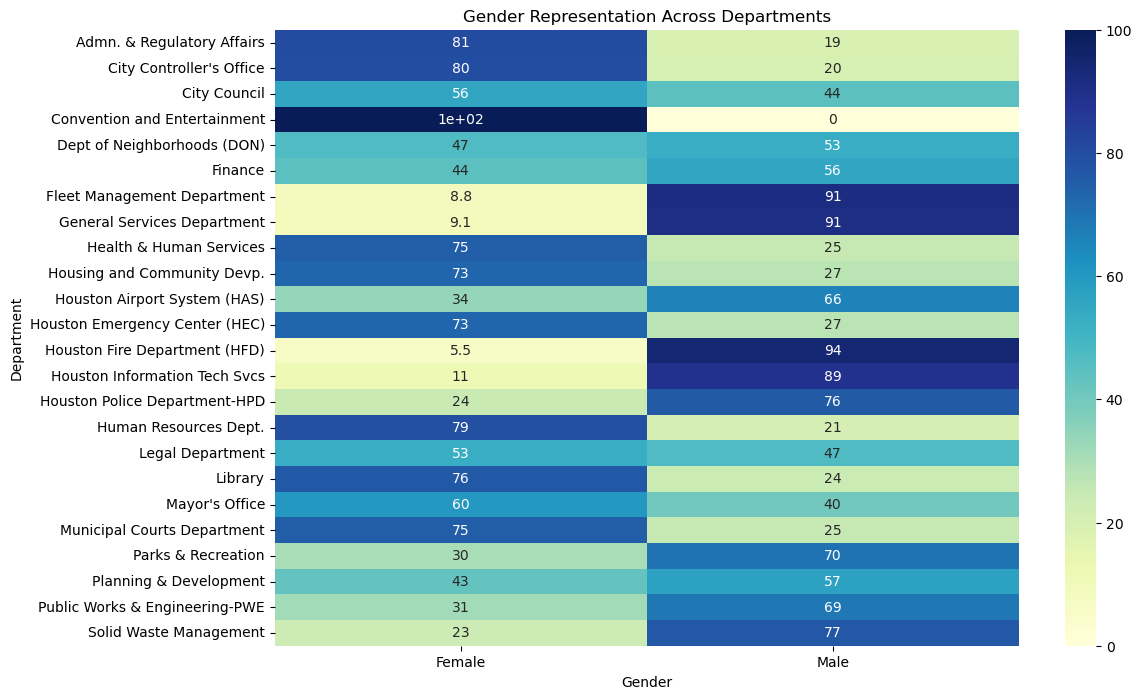

In [26]:
# Visualize gender representation across departments or roles
department_gender_representation = department_gender_representation.unstack().fillna(0)
plt.figure(figsize=(12, 8))
sns.heatmap(department_gender_representation, annot=True, cmap='YlGnBu')
plt.title('Gender Representation Across Departments')
plt.xlabel('Gender')
plt.ylabel('Department')
plt.show()

In [29]:
# Perform chi-square test for department representation
chi2, p, _, _ = chi2_contingency(department_gender_representation)
if p < 0.05:
    print("There is a significant difference in gender representation across departments (p < 0.05)")
else:
    print("There is no significant difference in gender representation across departments (p >= 0.05)")

There is no significant difference in gender representation across departments (p >= 0.05)


### Question 3: Employment Type Distribution:

1. What proportion of employees are full-time, part-time, or contract workers?
2. Are there differences in employment types across departments or positions?


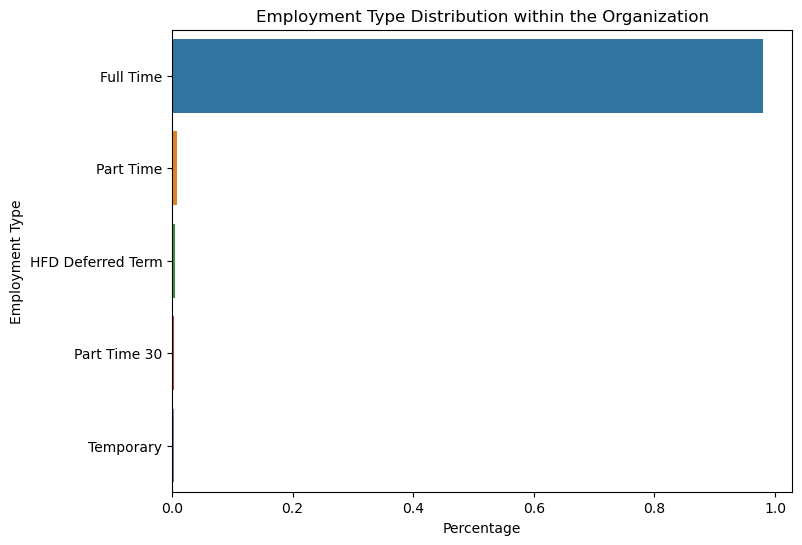

In [32]:
# Calculate the employment type distribution within the organization
employment_type_distribution = df['employment_type'].value_counts(
    normalize=True)
plt.figure(figsize=(8, 6))
sns.barplot(x=employment_type_distribution.values,
            y=employment_type_distribution.index)
plt.title('Employment Type Distribution within the Organization')
plt.xlabel('Percentage')
plt.ylabel('Employment Type')
plt.show()

In [33]:
# Calculate the percentage representation of each employment type
employment_type_representation = df['employment_type'].value_counts(
    normalize=True) * 100
employment_type_representation

employment_type
Full Time            97.913486
Part Time             0.865140
HFD Deferred Term     0.458015
Part Time 30          0.407125
Temporary             0.356234
Name: proportion, dtype: float64

In [34]:
# Calculate representation by department
department_employment_type_representation = df.groupby(
    'department')['employment_type'].value_counts(normalize=True) * 100

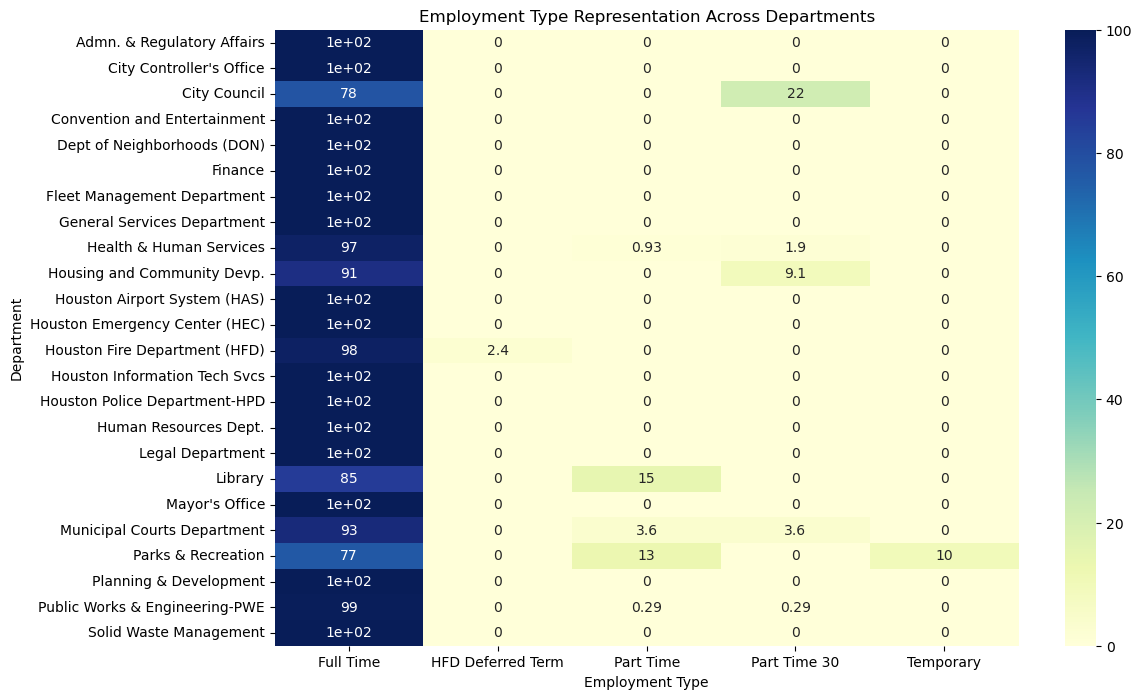

In [35]:
# Visualize employment type differences across departments
department_employment_type_representation = department_employment_type_representation.unstack().fillna(0)
plt.figure(figsize=(12, 8))
sns.heatmap(department_employment_type_representation,
            annot=True, cmap='YlGnBu')
plt.title('Employment Type Representation Across Departments')
plt.xlabel('Employment Type')
plt.ylabel('Department')
plt.show()

In [36]:
# Perform chi-square test for department representation
chi2, p, _, _ = chi2_contingency(department_employment_type_representation)
if p < 0.05:
    print("There is a significant difference in employment type representation across departments (p < 0.05)")
else:
    print("There is no significant difference in employment type representation across departments (p >= 0.05)")

There is a significant difference in employment type representation across departments (p < 0.05)


### Question 4: Age Distribution:

1.  What is the age distribution of employees within the organization? (Can't be determined from current dataset)
2.  Are there any age-related trends in job titles or salary levels? (Can't be determined from current dataset)


### Question 5: Tenure Analysis:

1.  What is the distribution of employee tenure (length of employment) within the organization?
2.  Are there differences in tenure between different demographic groups or departments?


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1965 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   unique_id          1965 non-null   int64         
 1   position_title     1965 non-null   object        
 2   department         1965 non-null   object        
 3   base_salary        1965 non-null   float64       
 4   race               1965 non-null   object        
 5   employment_type    1965 non-null   object        
 6   gender             1965 non-null   object        
 7   employment_status  1965 non-null   object        
 8   hire_date          1965 non-null   datetime64[ns]
 9   job_date           1965 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(6)
memory usage: 168.9+ KB


In [55]:
df.head()

,unique_id,position_title,department,base_salary,race,employment_type,gender,employment_status,hire_date,job_date
0,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,2006-06-12,2012-10-13
1,1,LIBRARY ASSISTANT,Library,26125.0,Hispanic/Latino,Full Time,Female,Active,2000-07-19,2010-09-18
2,2,POLICE OFFICER,Houston Police Department-HPD,45279.0,White,Full Time,Male,Active,2015-02-03,2015-02-03
3,3,ENGINEER/OPERATOR,Houston Fire Department (HFD),63166.0,White,Full Time,Male,Active,1982-02-08,1991-05-25
4,4,ELECTRICIAN,General Services Department,56347.0,White,Full Time,Male,Active,1989-06-19,1994-10-22


In [56]:
# Calculate tenure based on hire date and job date
df['tenure'] = (pd.to_datetime(df['job_date']) -
                pd.to_datetime(df['hire_date'])).dt.days

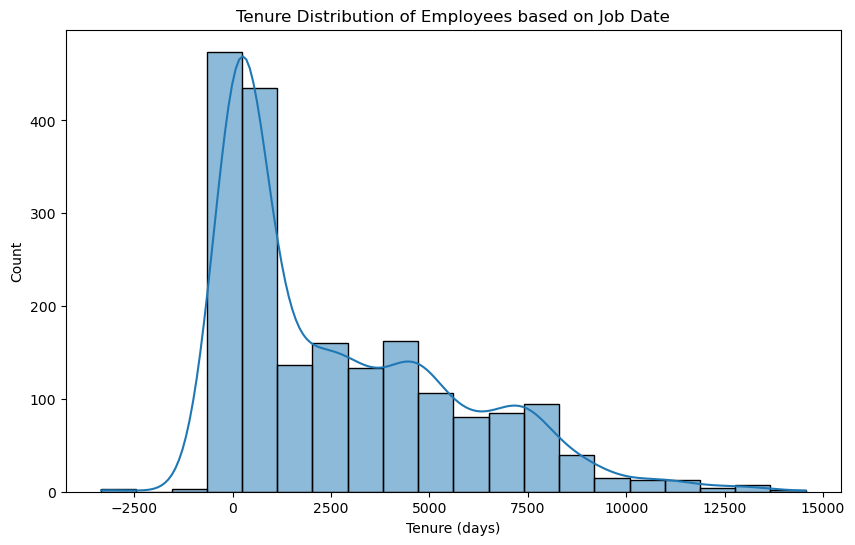

In [57]:
# Calculate the tenure distribution within the organization
plt.figure(figsize=(10, 6))
sns.histplot(df['tenure'], bins=20, kde=True)
plt.title('Tenure Distribution of Employees based on Job Date')
plt.xlabel('Tenure (days)')
plt.ylabel('Count')
plt.show()

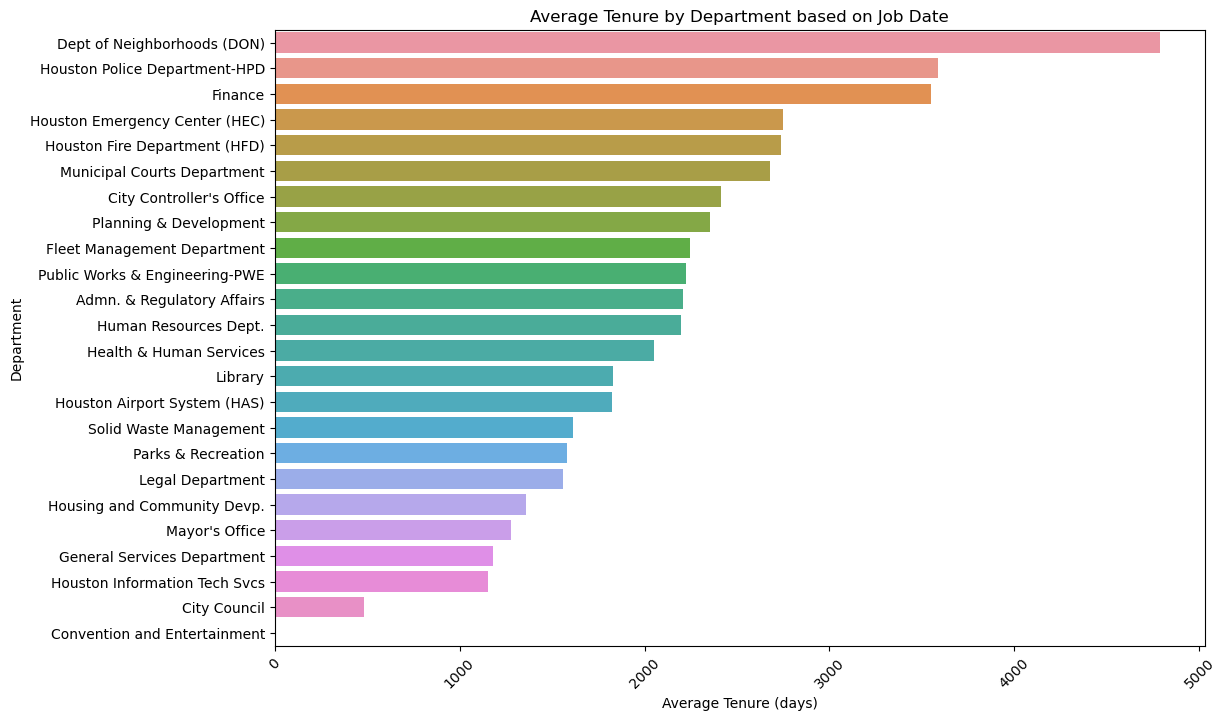

In [58]:
# Calculate average tenure by department
department_tenure = df.groupby('department')[
    'tenure'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=department_tenure.values, y=department_tenure.index)
plt.title('Average Tenure by Department based on Job Date')
plt.xlabel('Average Tenure (days)')
plt.ylabel('Department')
plt.xticks(rotation=45)
plt.show()

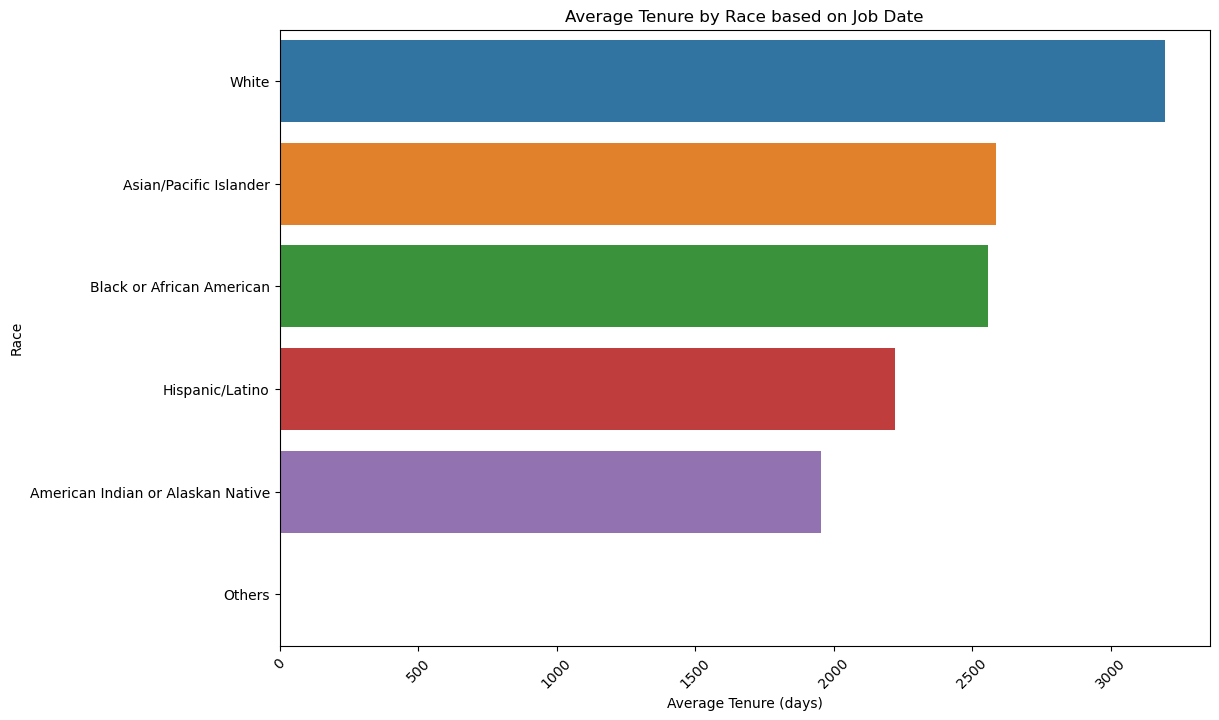

In [60]:
# Calculate average tenure by race
department_tenure = df.groupby(
    'race')['tenure'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=department_tenure.values, y=department_tenure.index)
plt.title('Average Tenure by Race based on Job Date')
plt.xlabel('Average Tenure (days)')
plt.ylabel('Race')
plt.xticks(rotation=45)
plt.show()

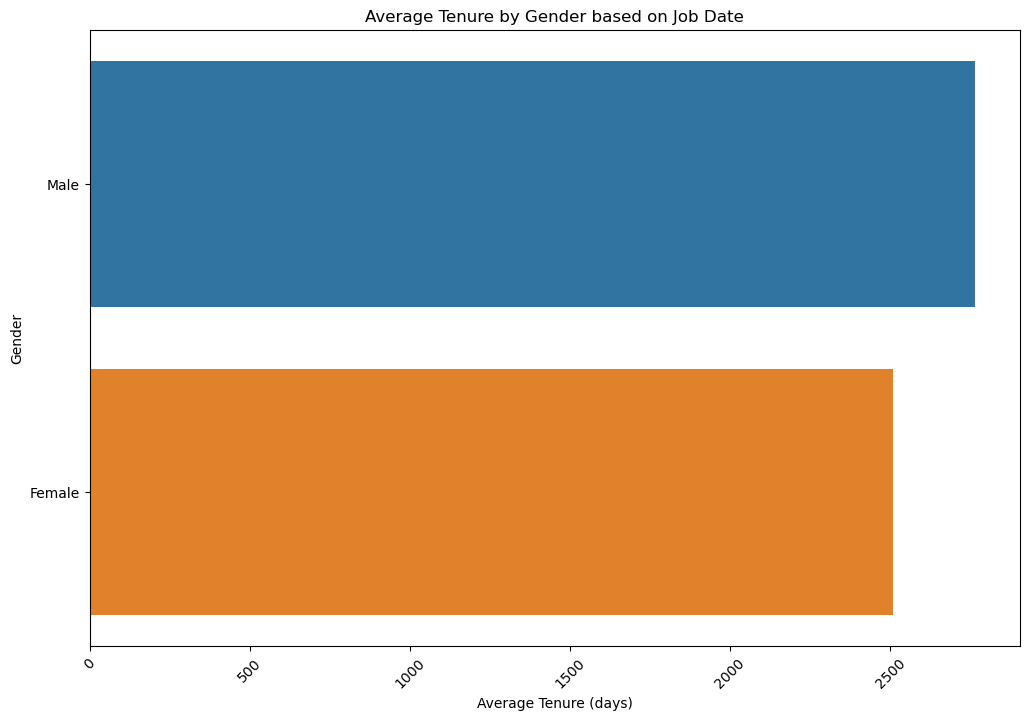

In [61]:
# Calculate average tenure by gender
department_tenure = df.groupby(
    'gender')['tenure'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=department_tenure.values, y=department_tenure.index)
plt.title('Average Tenure by Gender based on Job Date')
plt.xlabel('Average Tenure (days)')
plt.ylabel('Gender')
plt.xticks(rotation=45)
plt.show()

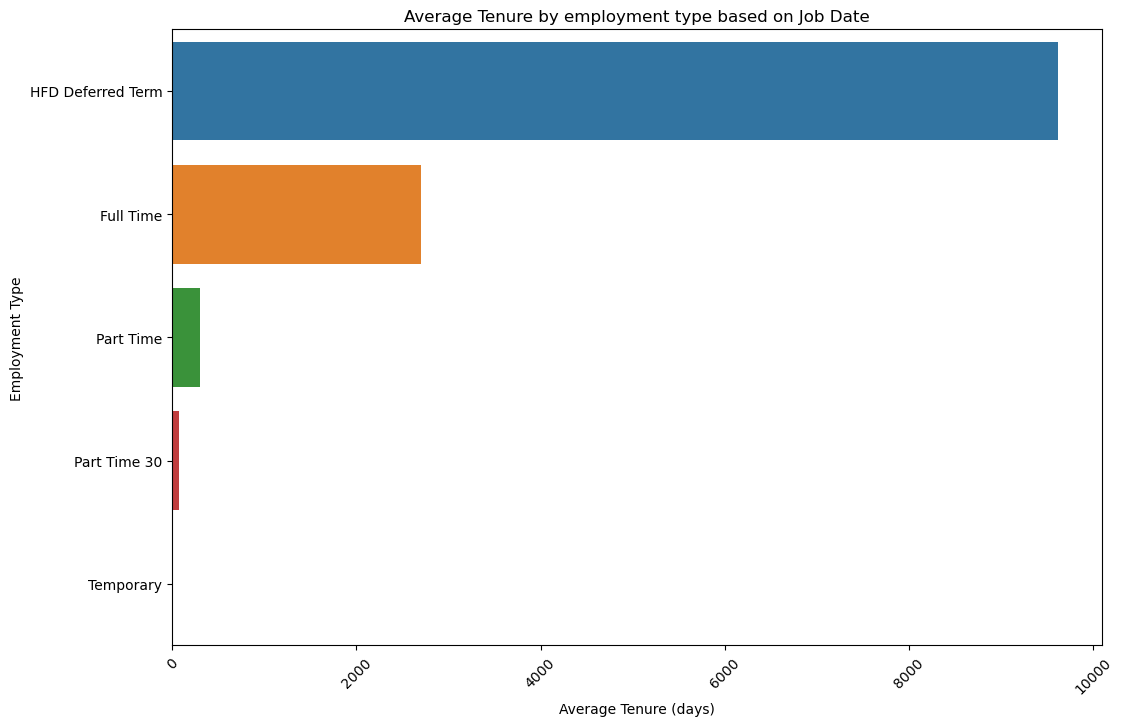

In [63]:
# Calculate average tenure by employment_type
department_tenure = df.groupby(
    'employment_type')['tenure'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=department_tenure.values, y=department_tenure.index)
plt.title('Average Tenure by employment type based on Job Date')
plt.xlabel('Average Tenure (days)')
plt.ylabel('Employment Type')
plt.xticks(rotation=45)
plt.show()

### Question 6: Salary Distribution:

1. What is the distribution of base salaries across the organization? (mean, mode, median)
2. Are there any outliers or anomalies in salary levels?


In [75]:
# Calculate mean base_salary
mean_base_salary = df['base_salary'].mean().round(2)
mean_base_salary

56049.42

In [76]:
# Calculate mode base_salary
mode_base_salary = df['base_salary'].mode().values[0].round(2)
mode_base_salary

66614.0

In [77]:
# Calculate median base_salary
median_base_salary = df['base_salary'].median().round(2)
median_base_salary

55461.0

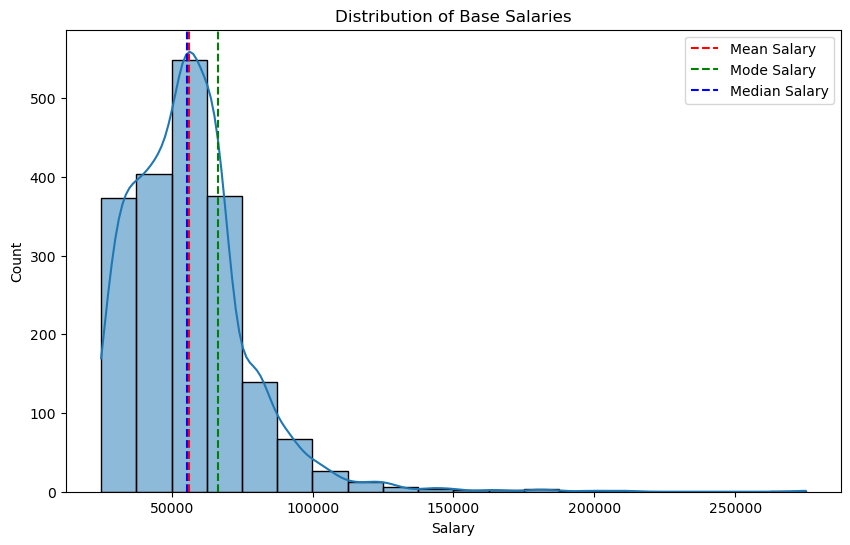

In [67]:
# Visualize the distribution of base_salary
plt.figure(figsize=(10, 6))
sns.histplot(df['base_salary'], bins=20, kde=True)
plt.axvline(mean_base_salary, color='r', linestyle='--', label='Mean Salary')
plt.axvline(mode_base_salary, color='g', linestyle='--', label='Mode Salary')
plt.axvline(median_base_salary, color='b',
            linestyle='--', label='Median Salary')
plt.title('Distribution of Base Salaries')
plt.xlabel('Salary')
plt.ylabel('Count')
plt.legend()
plt.show()

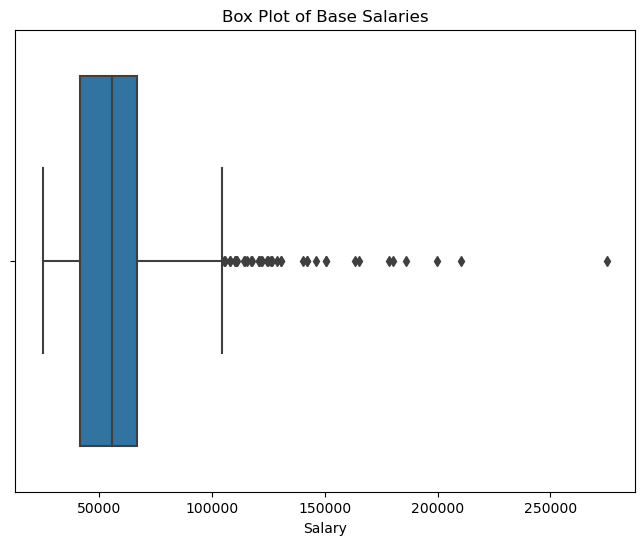

In [68]:
# Visualize the distribution of base_salary using a box plot and identify outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['base_salary'])
plt.title('Box Plot of Base Salaries')
plt.xlabel('Salary')
plt.show()

### Question 7: Salary Disparities:

1. Are there significant differences in salaries between different demographic groups (e.g., race, gender)?
2. Is there evidence of gender or racial pay gaps within the organization?


In [80]:
# Calculate average salary by race/ethnicity
average_salary_by_race = df.groupby(
    'race')['base_salary'].mean().sort_values(ascending=False).round(2)
average_salary_by_race

race
White                                63665.20
Asian/Pacific Islander               61550.17
American Indian or Alaskan Native    59862.63
Hispanic/Latino                      52473.90
Others                               51278.00
Black or African American            50379.09
Name: base_salary, dtype: float64

In [81]:
# Calculate average salary by gender
average_salary_by_gender = df.groupby(
    'gender')['base_salary'].mean().sort_values(ascending=False).round(2)
average_salary_by_gender

gender
Male      57537.79
Female    52572.34
Name: base_salary, dtype: float64

In [82]:
# Perform t-tests or ANOVA to determine if there are significant differences in salaries between different demographic groups
# For example, to perform a t-test for gender pay gap:
from scipy.stats import ttest_ind

male_salaries = df[df['gender'] == 'Male']['base_salary']
female_salaries = df[df['gender'] == 'Female']['base_salary']

t_stat, p_value = ttest_ind(male_salaries, female_salaries)
if p_value < 0.05:
    gender_pay_gap = True
else:
    gender_pay_gap = False

In [84]:
# Print average salaries by demographic groups and whether there is evidence of gender pay gap
print("\nIs there evidence of gender pay gap?")
print(gender_pay_gap)


Is there evidence of gender pay gap?
True


### Question 8: Salary by Department/Position:

1. What is the average salary within each department or position title?
2. Are there departments or roles that offer higher salaries compared to others?


In [86]:
# Calculate average salary by department
average_salary_by_department = df.groupby(
    'department')['base_salary'].mean().sort_values(ascending=False).round(2)
average_salary_by_department

department
Legal Department                  104959.53
Mayor's Office                     86489.60
Finance                            80444.78
Houston Information Tech Svcs      76112.78
City Council                       62037.65
Housing and Community Devp.        60876.81
Houston Police Department-HPD      59964.87
Houston Fire Department (HFD)      59805.57
Human Resources Dept.              56311.83
City Controller's Office           55711.60
Planning & Development             54879.57
Houston Airport System (HAS)       53990.37
Municipal Courts Department        53889.85
Admn. & Regulatory Affairs         53053.73
Health & Human Services            51447.53
General Services Department        51295.82
Public Works & Engineering-PWE     50240.23
Houston Emergency Center (HEC)     47107.36
Dept of Neighborhoods (DON)        47092.88
Library                            46076.70
Fleet Management Department        44790.97
Parks & Recreation                 43215.55
Solid Waste Managemen

In [87]:
# Calculate average salary by position
average_salary_by_position = df.groupby(
    'position_title')['base_salary'].mean().sort_values(ascending=False).round(2)
average_salary_by_position

position_title
CITY ATTORNEY                               275000.00
ASSOCIATE EMS PHYSICIAN DIRECTOR,MD         210588.00
DEPUTY DIRECTOR-FINANCE & ADMINISTRATION    199596.00
DEPUTY DIRECTOR-AVIATION (EX LVL)           186192.00
CHIEF PHYSICIAN,MD                          180416.00
                                              ...    
LABORER                                      26273.70
CUSTODIAN                                    26168.45
LIBRARY ASSISTANT                            26125.00
SENIOR CLERK                                 26125.00
CAR ATTENDANT                                24960.00
Name: base_salary, Length: 325, dtype: float64

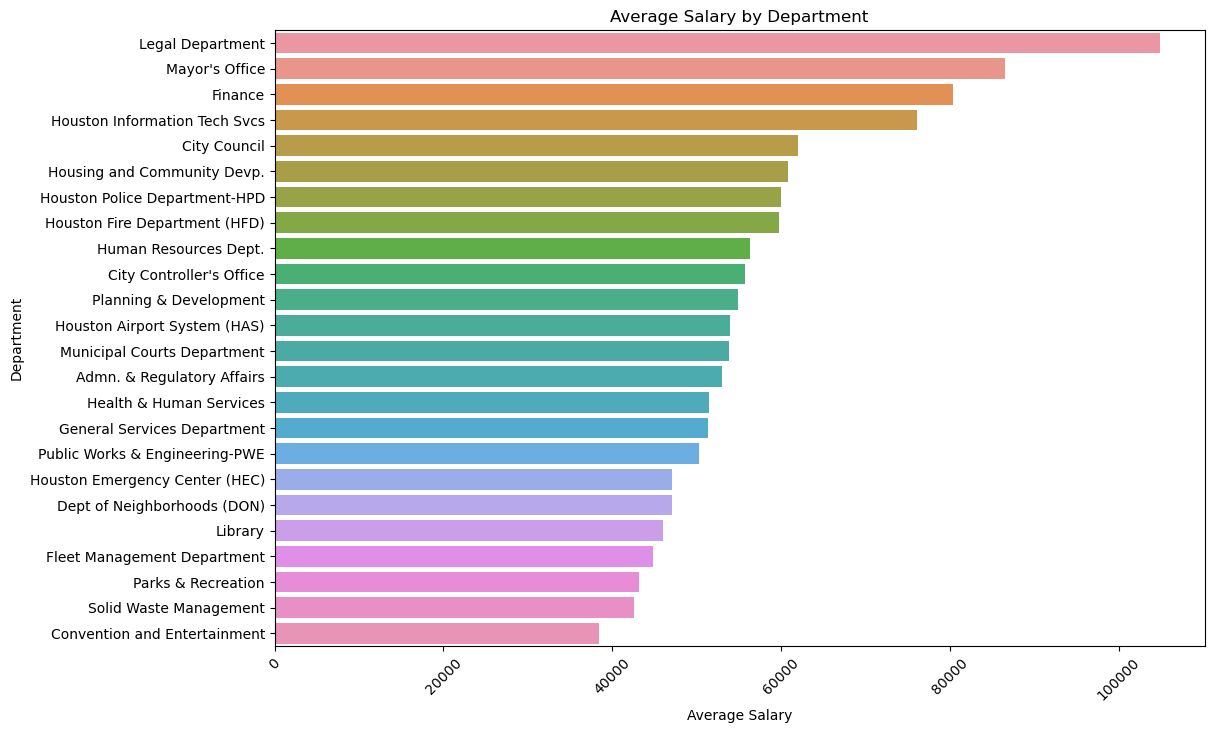

In [89]:
# Visualize average salaries by department
plt.figure(figsize=(12, 8))
sns.barplot(x=average_salary_by_department.values,
            y=average_salary_by_department.index)
plt.title('Average Salary by Department')
plt.xlabel('Average Salary')
plt.ylabel('Department')
plt.xticks(rotation=45)
plt.show()

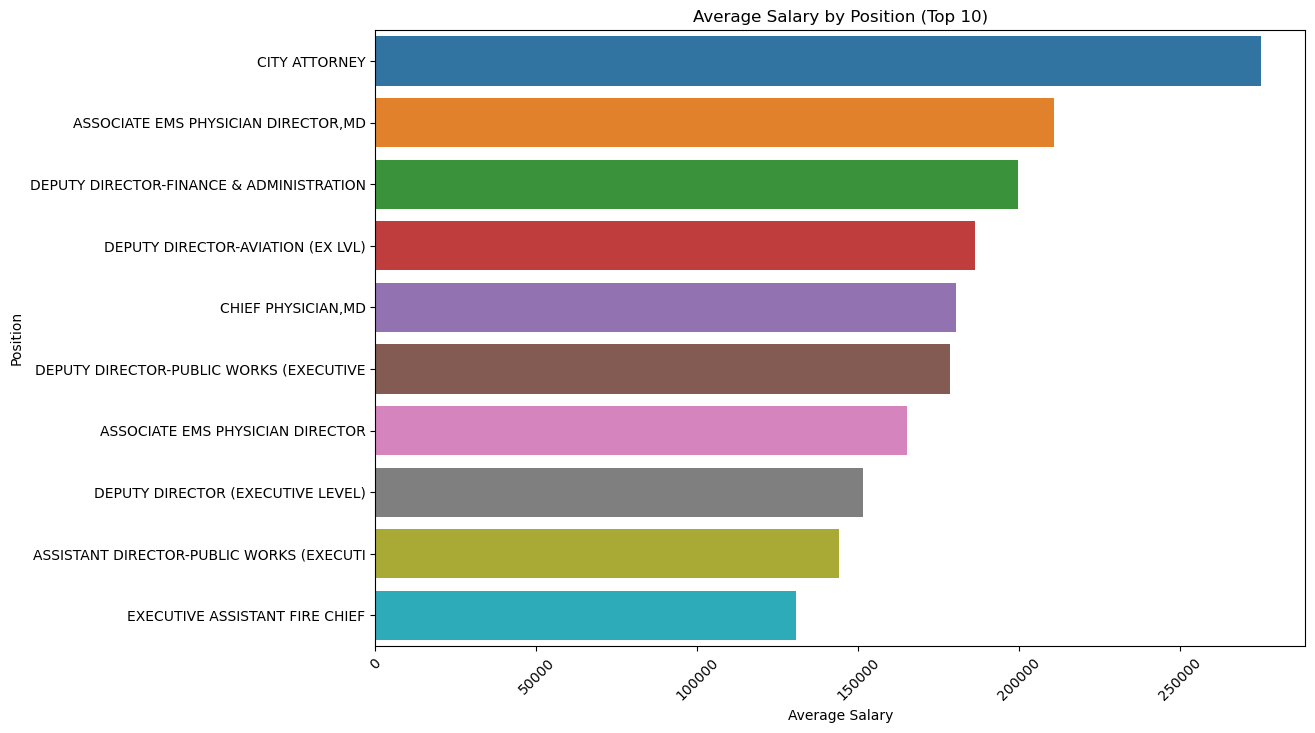

In [90]:
plt.figure(figsize=(12, 8))
sns.barplot(
    x=average_salary_by_position.values[:10], y=average_salary_by_position.index[:10])
plt.title('Average Salary by Position (Top 10)')
plt.xlabel('Average Salary')
plt.ylabel('Position')
plt.xticks(rotation=45)
plt.show()